# 00 - Exploration

In [2]:
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

Tue Oct 23 2018 

CPython 3.6.4
IPython 7.0.1

numpy 1.15.2
scipy 1.1.0
sklearn 0.20.0
pandas 0.23.4

compiler   : GCC 7.2.0
system     : Linux
release    : 4.15.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 12
interpreter: 64bit


In [3]:
# Magic commands must be in separate cells 
# to properly display light background for 
# plots with JupyterLab dark theme 

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import sys

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

import seaborn as sns
plt.style.use('ggplot')
sns.set()
# plt.style.use('seaborn')
mpl.style.use('seaborn')

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999
pd.options.display.max_rows = 500
np.set_printoptions(precision=6)

DATA_PATH = '../data/'

print(pd.__version__)

0.23.4


# Read CSV

In [5]:
import os

RAW_PATH = os.path.join(DATA_PATH, 'raw', 'diabetic_data.csv')

raw_df = pd.read_csv(RAW_PATH, na_values='?')

# replace NO as >30
raw_df['readmitted'] = raw_df['readmitted'].replace({'NO': '>30'})

print(raw_df.shape)
display(raw_df.head())

(101766, 50)


/home/nathaniel/miniconda3/envs/dia/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


## Feature Info
- Null values
- data types (dtypes)
- unique values

In [6]:
print(f'Total num samples: {raw_df.shape[0]} \n')

null_df = raw_df.isnull().sum()
dtypes_df = raw_df.dtypes
nunique_df = raw_df.nunique(dropna=False)

summary_df = pd.concat([null_df, dtypes_df, nunique_df], axis=1)
summary_df.columns = ['num_null', 'dtype', 'nunique']

display(summary_df)

Total num samples: 101766 



,num_null,dtype,nunique
encounter_id,0,int64,101766
patient_nbr,0,int64,71518
race,2273,object,6
gender,0,object,3
age,0,object,10
weight,98569,object,10
admission_type_id,0,int64,8
discharge_disposition_id,0,int64,26
admission_source_id,0,int64,17
time_in_hospital,0,int64,14


## Define Feature Types

In [7]:
ignore_features = [
    'encounter_id',
    'patient_nbr',
]

continuous_features = [
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses',
]

output_features = ['readmitted']

categorical_features = [var for var in raw_df.columns 
                        if var not in ignore_features 
                        and var not in continuous_features
                        and var not in output_features]

print(categorical_features)

['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


## Inspect Continuous Features - Before Downsampling

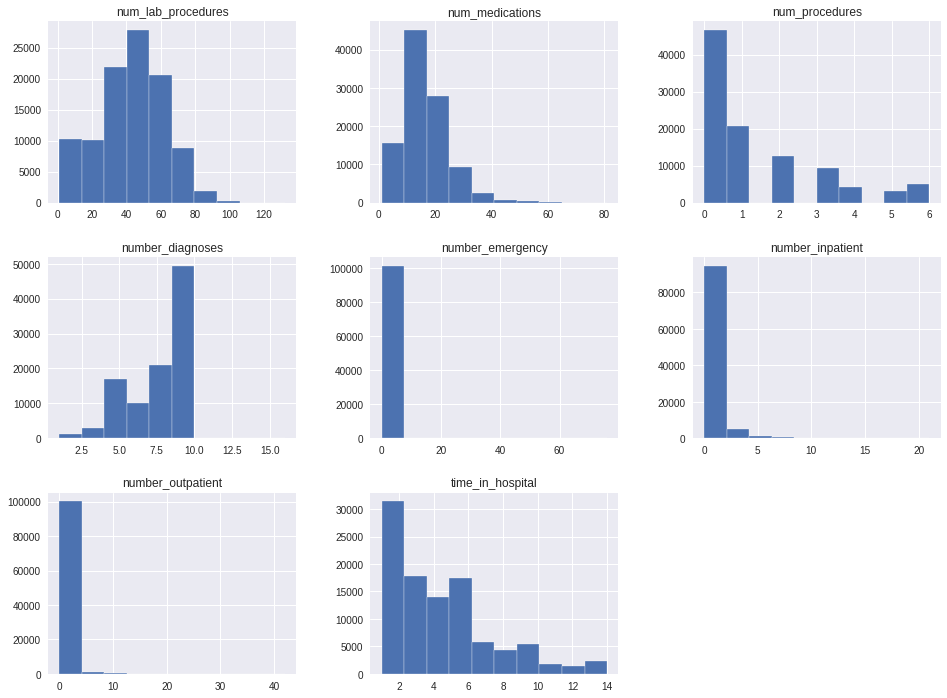

In [8]:
axes = raw_df.hist(column=continuous_features, figsize=(16,12))

## Inspect Categorical Features - Before Downsampling

In [9]:
def display_categorical_features(df, features, ignore=None):
    for var in features:
        if var in ignore:
            continue
        print(f'\n{var}: {df[var].nunique(dropna=False)} unique values \n')
        display(df[var].value_counts(dropna=False).sort_index())
        print('-'*50) 

In [10]:
display_categorical_features(raw_df, 
                             features=categorical_features+output_features, 
                             ignore=['diag_1', 'diag_2', 'diag_3'])


race: 6 unique values 



AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
NaN                 2273
Name: race, dtype: int64

--------------------------------------------------

gender: 3 unique values 



Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

--------------------------------------------------

age: 10 unique values 



[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: age, dtype: int64

--------------------------------------------------

weight: 10 unique values 



>200             3
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
NaN          98569
Name: weight, dtype: int64

--------------------------------------------------

admission_type_id: 8 unique values 



1    53990
2    18480
3    18869
4       10
5     4785
6     5291
7       21
8      320
Name: admission_type_id, dtype: int64

--------------------------------------------------

discharge_disposition_id: 26 unique values 



1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
Name: discharge_disposition_id, dtype: int64

--------------------------------------------------

admission_source_id: 17 unique values 



1     29565
2      1104
3       187
4      3187
5       855
6      2264
7     57494
8        16
9       125
10        8
11        2
13        1
14        2
17     6781
20      161
22       12
25        2
Name: admission_source_id, dtype: int64

--------------------------------------------------

payer_code: 18 unique values 



BC      4655
CH       146
CM      1937
CP      2533
DM       549
FR         1
HM      6274
MC     32439
MD      3532
MP        79
OG      1033
OT        95
PO       592
SI        55
SP      5007
UN      2448
WC       135
NaN    40256
Name: payer_code, dtype: int64

--------------------------------------------------

medical_specialty: 73 unique values 



AllergyandImmunology                        7
Anesthesiology                             12
Anesthesiology-Pediatric                   19
Cardiology                               5352
Cardiology-Pediatric                        7
DCPTEAM                                     6
Dentistry                                   4
Dermatology                                 1
Emergency/Trauma                         7565
Endocrinology                             120
Endocrinology-Metabolism                    8
Family/GeneralPractice                   7440
Gastroenterology                          564
Gynecology                                 58
Hematology                                 82
Hematology/Oncology                       207
Hospitalist                                57
InfectiousDiseases                         37
InternalMedicine                        14635
Nephrology                               1613
Neurology                                 203
Neurophysiology                   

--------------------------------------------------

max_glu_serum: 4 unique values 



>200     1485
>300     1264
None    96420
Norm     2597
Name: max_glu_serum, dtype: int64

--------------------------------------------------

A1Cresult: 4 unique values 



>7       3812
>8       8216
None    84748
Norm     4990
Name: A1Cresult, dtype: int64

--------------------------------------------------

metformin: 4 unique values 



Down        575
No        81778
Steady    18346
Up         1067
Name: metformin, dtype: int64

--------------------------------------------------

repaglinide: 4 unique values 



Down          45
No        100227
Steady      1384
Up           110
Name: repaglinide, dtype: int64

--------------------------------------------------

nateglinide: 4 unique values 



Down          11
No        101063
Steady       668
Up            24
Name: nateglinide, dtype: int64

--------------------------------------------------

chlorpropamide: 4 unique values 



Down           1
No        101680
Steady        79
Up             6
Name: chlorpropamide, dtype: int64

--------------------------------------------------

glimepiride: 4 unique values 



Down        194
No        96575
Steady     4670
Up          327
Name: glimepiride, dtype: int64

--------------------------------------------------

acetohexamide: 2 unique values 



No        101765
Steady         1
Name: acetohexamide, dtype: int64

--------------------------------------------------

glipizide: 4 unique values 



Down        560
No        89080
Steady    11356
Up          770
Name: glipizide, dtype: int64

--------------------------------------------------

glyburide: 4 unique values 



Down        564
No        91116
Steady     9274
Up          812
Name: glyburide, dtype: int64

--------------------------------------------------

tolbutamide: 2 unique values 



No        101743
Steady        23
Name: tolbutamide, dtype: int64

--------------------------------------------------

pioglitazone: 4 unique values 



Down        118
No        94438
Steady     6976
Up          234
Name: pioglitazone, dtype: int64

--------------------------------------------------

rosiglitazone: 4 unique values 



Down         87
No        95401
Steady     6100
Up          178
Name: rosiglitazone, dtype: int64

--------------------------------------------------

acarbose: 4 unique values 



Down           3
No        101458
Steady       295
Up            10
Name: acarbose, dtype: int64

--------------------------------------------------

miglitol: 4 unique values 



Down           5
No        101728
Steady        31
Up             2
Name: miglitol, dtype: int64

--------------------------------------------------

troglitazone: 2 unique values 



No        101763
Steady         3
Name: troglitazone, dtype: int64

--------------------------------------------------

tolazamide: 3 unique values 



No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64

--------------------------------------------------

examide: 1 unique values 



No    101766
Name: examide, dtype: int64

--------------------------------------------------

citoglipton: 1 unique values 



No    101766
Name: citoglipton, dtype: int64

--------------------------------------------------

insulin: 4 unique values 



Down      12218
No        47383
Steady    30849
Up        11316
Name: insulin, dtype: int64

--------------------------------------------------

glyburide-metformin: 4 unique values 



Down           6
No        101060
Steady       692
Up             8
Name: glyburide-metformin, dtype: int64

--------------------------------------------------

glipizide-metformin: 2 unique values 



No        101753
Steady        13
Name: glipizide-metformin, dtype: int64

--------------------------------------------------

glimepiride-pioglitazone: 2 unique values 



No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64

--------------------------------------------------

metformin-rosiglitazone: 2 unique values 



No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64

--------------------------------------------------

metformin-pioglitazone: 2 unique values 



No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64

--------------------------------------------------

change: 2 unique values 



Ch    47011
No    54755
Name: change, dtype: int64

--------------------------------------------------

diabetesMed: 2 unique values 



No     23403
Yes    78363
Name: diabetesMed, dtype: int64

--------------------------------------------------

readmitted: 2 unique values 



<30    11357
>30    90409
Name: readmitted, dtype: int64

--------------------------------------------------


In [13]:
raw_df['readmitted'].value_counts(normalize=True)

>30    0.888401
<30    0.111599
Name: readmitted, dtype: float64